# Primera entrega NBA Salaries

Integrantes:

- Nicolas Biojo
- Cristian Cobo
- David Erazo

# Preparación de datos

En una primera instancia, se cargaron en un dataframe de pandas el dataset que contiene estadisticas avanzadas del rendiemiento de los jugadores de la NBS durante la temporada 2017-2018. 

In [67]:
import pandas as pd
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [59]:
data = pd.read_csv('2017-18_NBA_salary.csv')
data.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Previo al análisis, se identificaron las variables cuantitativas y categoricas apartir del método .info(). Adicionalmente, este método nos permitió evidenciar la existencia de missing values a partir del número de registros por variable, los cuales fueron: TS%, 3PAr, FTr y TOV% en los registros 29 y 37.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
Player             485 non-null object
Salary             485 non-null int64
NBA_Country        485 non-null object
NBA_DraftNumber    485 non-null int64
Age                485 non-null int64
Tm                 485 non-null object
G                  485 non-null int64
MP                 485 non-null int64
PER                485 non-null float64
TS%                483 non-null float64
3PAr               483 non-null float64
FTr                483 non-null float64
ORB%               485 non-null float64
DRB%               485 non-null float64
TRB%               485 non-null float64
AST%               485 non-null float64
STL%               485 non-null float64
BLK%               485 non-null float64
TOV%               483 non-null float64
USG%               485 non-null float64
OWS                485 non-null float64
DWS                485 non-null float64
WS                 485 non-n

In [113]:
mColums = pd.isnull(data).any(0).to_numpy().nonzero()[0]
print("Missing values: ")
for col in mColums:
    print ("  index {} name {}".format(col,data.columns[col]))

Missing values: 
  index 9 name TS%
  index 10 name 3PAr
  index 11 name FTr
  index 18 name TOV%


In [114]:
index = pd.isnull(data).any(1).to_numpy().nonzero()[0]
print("{} incomplete records:".format(len(index)), index)

2 incomplete records: [29 37]


In [115]:
originalData = data.copy()
data = data.dropna()
print("Datos originales: ", originalData.shape)
print("Datos limpios y completos: ", data.shape)
print("Se eliminaron {} registos".format(originalData.shape[0] - data.shape[0]))

Datos originales:  (485, 28)
Datos limpios y completos:  (483, 28)
Se eliminaron 2 registos


Acontinuación, se lleva acabo un análisis sobre las variables de mayor relevancia para identificar inconsistencias o datos erronoes. 

- NBA_Country: No existen dos o más labels distintos para representar un mismo país.
- Age: No existe ningun jugador el cual sea menor de 18 años.
- Salary: Todos los pagos a los jugadores son valores positivos

In [116]:
data["NBA_Country"].unique()

array(['China', 'Georgia', 'USA', 'Canada', 'Spain', 'France',
       'Czech Republic', 'Russia', 'South Sudan', 'Switzerland',
       'New Zealand', 'Haiti', 'Democratic Re_', 'Tunisia', 'Brazil',
       'Germany', 'Australia', 'Cameroon', 'Israel', 'Turkey',
       'United Kingdo...', 'Montenegro', 'Serbia', 'Argentina', 'Bosnia',
       'Lithuania', 'Croatia', 'Italy', 'Poland', 'Dominican Rep...',
       'Finland', 'Latvia', 'Bosnia & Herz...', 'Sweden', 'Ukraine',
       'Austria', 'Puerto Rico', 'Senegal', 'Slovenia', 'Greece',
       'Democratic Re...', 'Mali', 'Bahamas', 'Egypt'], dtype=object)

In [112]:
print ("Menores de edad: {}".formatdata.loc[data.Age < 18].shape[0])

Menores de edad: 0


In [117]:
data.describe()

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,4.830000e+02,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,...,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,6.660622e+06,29.395445,26.273292,50.370600,1158.915114,13.315735,0.535387,0.337383,0.263404,4.893996,...,13.140373,18.975569,1.280745,1.181366,2.465424,0.080325,-1.252588,-0.489441,-1.741822,0.601242
std,7.398214e+06,21.116033,4.274290,24.723561,809.627553,8.745666,0.112352,0.226894,0.294578,4.581519,...,6.115290,5.826533,1.883545,1.033939,2.674520,0.163229,5.028752,2.394156,5.665905,1.247636
min,4.608000e+04,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.700000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,-1.300000
25%,1.471382e+06,10.500000,23.000000,29.500000,385.000000,9.800000,0.505500,0.167000,0.155000,1.800000,...,9.900000,15.000000,0.000000,0.300000,0.300000,0.040500,-2.600000,-1.700000,-3.500000,-0.100000
50%,3.218280e+06,25.000000,26.000000,59.000000,1151.000000,13.200000,0.545000,0.346000,0.231000,3.300000,...,12.500000,17.900000,0.800000,1.000000,1.900000,0.083000,-1.100000,-0.400000,-1.300000,0.100000
75%,1.000000e+07,47.000000,29.000000,71.000000,1824.500000,16.550000,0.582500,0.481000,0.319500,7.050000,...,15.750000,22.250000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.550000,0.900000
max,3.468255e+07,62.000000,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,35.900000,...,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000


# Visualización de datos

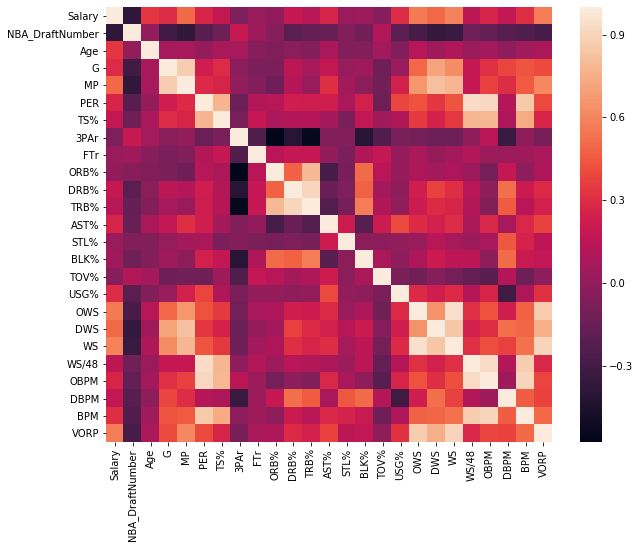

<Figure size 7200x4320 with 0 Axes>

In [118]:
fig = plt.figure(figsize=(10,8))
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=False)
plt.figure(figsize=(100,60))
plt.show()

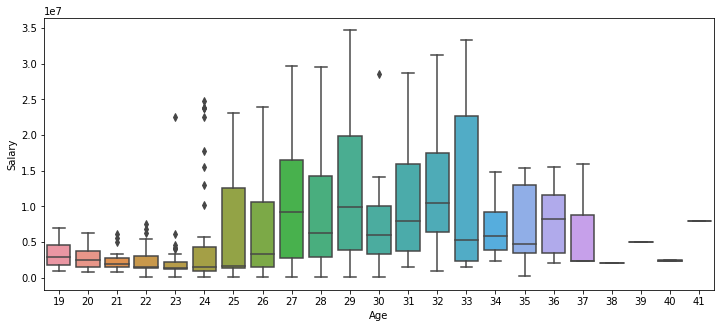

In [119]:
fig = plt.figure(figsize=(12,5))
sn.boxplot('Age', 'Salary', data=data, orient='v')

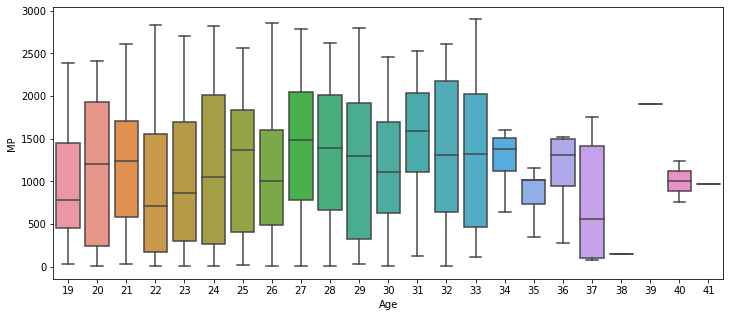

In [120]:
fig = plt.figure(figsize=(12,5))
sn.boxplot('Age', 'MP', data=data, orient='v')

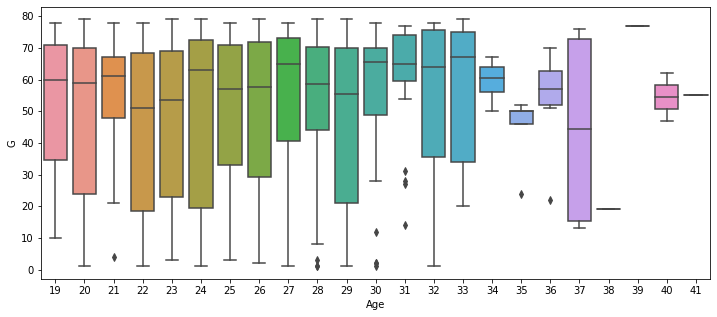

In [121]:
fig = plt.figure(figsize=(12,5))
sn.boxplot('Age', 'G', data=data, orient='v')

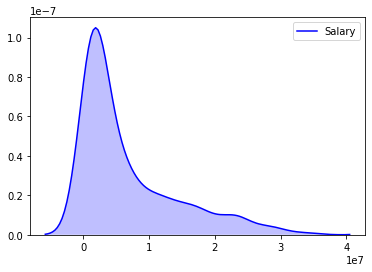

In [122]:
s = data.iloc[:,1]
ax = sn.kdeplot(s, shade=True, color="b")

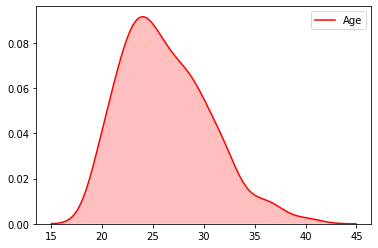

In [123]:
d = data.iloc[:,4]
ax = sn.kdeplot(d, shade=True, color="r")

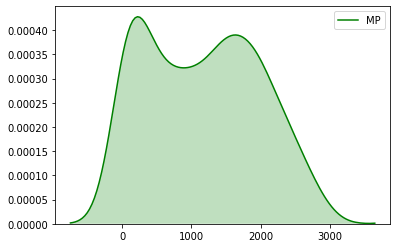

In [124]:
d = data.iloc[:,7]
ax = sn.kdeplot(d, shade=True, color="g")

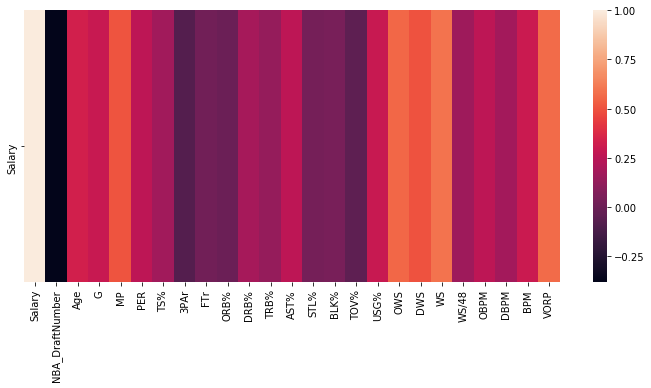

In [125]:
fig = plt.figure(figsize=(12,5))
sn.heatmap(corrMatrix[:1], annot=False)
plt.show()

In [126]:
np.array(corrMatrix)[0:1,:]

array([[ 1.00000000e+00, -3.80664126e-01,  3.36000823e-01,
         2.94014490e-01,  5.05095218e-01,  2.66495306e-01,
         1.74758738e-01, -7.35023237e-02,  2.34944909e-02,
         7.47192813e-04,  1.90907283e-01,  1.35331593e-01,
         2.63262857e-01,  3.06574568e-02,  4.20449389e-02,
        -4.32050254e-02,  2.94996071e-01,  5.61988901e-01,
         5.03794351e-01,  5.91306748e-01,  1.60953769e-01,
         2.63521477e-01,  1.78119142e-01,  3.08737429e-01,
         5.73295072e-01]])